**MOUNT DRIVE**

In [1]:
import sys
from google.colab import files
sys.path.insert(0,'/content/drive/MyDrive/IR_Project')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Let's Begin**

In [4]:
import os
os.listdir('/content/drive/MyDrive/IR_Project')


['data_train.csv']

**Libraries**

In [5]:
import numpy as np  # For numerical computing
import pandas as pd  # For data manipulation
import re  # For regular expressions
import nltk  # For natural language processing tasks
from nltk.corpus import stopwords  # For removing stop words
from nltk.stem.porter import PorterStemmer  # For stemming words
from nltk.tokenize import word_tokenize  # For tokenizing strings into words

from sklearn.feature_extraction.text import TfidfVectorizer  # For converting text data to numerical vectors using tf-idf
from sklearn.preprocessing import LabelEncoder  # For encoding categorical variables
from sklearn.preprocessing import OneHotEncoder  # For one-hot encoding categorical variables
from sklearn.preprocessing import OrdinalEncoder  # For ordinal encoding categorical variables
from sklearn.preprocessing import StandardScaler  # For standardizing numerical features
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.impute import KNNImputer  # For imputing missing values using k-nearest neighbors

from sklearn.tree import DecisionTreeClassifier  # For building a decision tree classifier
from sklearn import svm  # For building a support vector machine classifier
from sklearn.svm import SVC  # For building a support vector machine classifier

from sklearn.metrics import accuracy_score  # For computing classification accuracy
from sklearn.metrics import precision_score  # For computing precision
from sklearn.metrics import recall_score  # For computing recall
from sklearn.metrics import f1_score  # For computing F1 score
from sklearn.metrics import cohen_kappa_score  # For computing Cohen's kappa score
from sklearn.metrics import confusion_matrix  # For computing confusion matrix
from sklearn.metrics import hamming_loss  # For computing Hamming loss
from sklearn.metrics import classification_report  # For generating a classification report
nltk.download('stopwords') #english stopwords
import nltk
import time
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**Preprocessing Functions**

In [12]:
def selectFeatures(data):
    # Discard columns that are not needed
    data.drop(['country', 'sku_id', 'price', 'origin'], inplace=True, axis=1)

    # Merge 'title' and 'description' into one column
    data['titleDescription'] = data['title'] + " " + data['description']

    # Remove the original 'title' and 'description' columns
    data.drop(['title', 'description'], inplace=True, axis=1)

    # Get the target variables from the DataFrame
    level1 = data['category_lvl1']
    level2 = data['category_lvl2']
    level3 = data['category_lvl3']

    return data, level1, level2, level3

def PreProcessing(text):
    # Create a stemmer object to reduce words to their root form
    ps = PorterStemmer()

    # Regular expression to remove HTML tags and entities from the text
    junk = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')

    # Remove non-alphabetic characters and HTML tags/entities from the text
    processed_tokens = re.sub('[^a-zA-Z]', ' ', str(text))
    processed_tokens = re.sub(junk, '', processed_tokens)

    # Convert text to lowercase and split into individual words
    processed_tokens = processed_tokens.lower()
    processed_tokens = word_tokenize(processed_tokens)
    # Initialize an empty list to store the stemmed words
    stemmed_words = []

    # Loop over each word in the text
    for word in processed_tokens:
        # Check if the word is not a stopword
        if word not in stopwords.words('english'):
            # Stem the word and add it to the list
            stemmed_words.append(ps.stem(word))

    # Replace the original text with the list of stemmed words
    processed_tokens = stemmed_words

    # Join the stemmed words back into a single string
    processed_tokens = ' '.join(processed_tokens)

    return processed_tokens

def Cleaning_Data(training_df):
    X, Y1, Y2, Y3 = selectFeatures(training_df)

    # Apply pre-processing to the 'titleDescription' column
    X['titleDescription'] = X['titleDescription'].apply(PreProcessing)

    # Return the pre-processed text data and the target variables
    return X, Y1, Y2, Y3

**KnnImpute Functions**

In [14]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Define column labels for the given dataset 'data_train.csv'
column_labels = ["country", "sku_id", "title", "category_lvl1", "category_lvl2", "category_lvl3", "description", "price", "origin"]

# Function to read the training dataset
def load_training_data(filepath):
    return pd.read_csv(filepath, header=None, names=column_labels)

# Function to display statistics on missing values in the dataset
def display_missing_data_stats(df):
    missing_values = df.isnull().sum()
    print('\nMissing data statistics:\n', missing_values)
    # Calculate the percentage of missing data in the entire dataset
    total_elements = np.prod(df.shape)
    missing_percentage = (missing_values.sum() / total_elements) * 100
    print(f'\nPercentage of missing data: {missing_percentage:.2f}%')

# Function to preserve unique labels in categorical columns
def preserve_label(train_df):
    labels_c1 = train_df['category_lvl1'].unique() # Extract unique labels for each categorical column
    labels_c2 = train_df['category_lvl2'].unique()
    labels_c3 = train_df['category_lvl3'].unique()
    return labels_c1, labels_c2, labels_c3

# Function to encode categorical columns and impute missing values using KNN
def encode_and_impute(train_df, target_columns):
    encoder = LabelEncoder() # instantiate a LabelEncoder object
    for column in target_columns:
        # Encode non-null values in the target column using LabelEncoder
        non_nulls = train_df[column].dropna()
        encoded_values = encoder.fit_transform(non_nulls)
        train_df.loc[train_df[column].notnull(), column] = encoded_values
    # Impute missing values using KNNImputer
    imputer = KNNImputer()
    imputed_data = np.round(imputer.fit_transform(train_df[target_columns]))
    train_df[target_columns] = imputed_data
    return train_df

# Function to clean the dataset and save it to a CSV file
def clean_and_save_csv(df, train_df, filename='train_clean.csv'):
    # Create a new DataFrame with cleaned columns and title-description concatenation
    df = pd.DataFrame(df, columns=['category_lvl1', 'category_lvl2', 'category_lvl3'])
    df['Title_desc'] = train_df['titleDescription']
    df.to_csv(filename, index=False, header=True) # write the new DataFrame to a CSV file without index and with column names
    return df # return the new cleaned DataFrame.



# **Training Data & Imputing it**

In [8]:

# Load the dataset
training_data = load_training_data('/content/drive/MyDrive/IR_Project/data_train.csv')

# Clean and preprocess the dataset
cleaned_data, target1, target2, target3 = Cleaning_Data(training_data)

# Display missing data statistics for the cleaned dataset
display_missing_data_stats(cleaned_data)

# Preserve unique labels for categorical columns before encoding
unique_cat1, unique_cat2, unique_cat3 = preserve_label(cleaned_data)

# Encode and impute the categorical columns
encoded_and_imputed_data = encode_and_impute(cleaned_data, ['category_lvl1', 'category_lvl2', 'category_lvl3'])

train_df_imputed = clean_and_save_csv(encoded_and_imputed_data, cleaned_data)

# Display missing data statistics for the imputed dataset
display_missing_data_stats(train_df_imputed)


Missing data statistics:
 category_lvl1          0
category_lvl2          0
category_lvl3       2135
titleDescription       0
dtype: int64

Percentage of missing data: 1.47%

Missing data statistics:
 category_lvl1    0
category_lvl2    0
category_lvl3    0
Title_desc       0
dtype: int64

Percentage of missing data: 0.00%


**PERFORMING FEATURE EXTRACTION AND SPLITTING DATA INTO TRAINING AND TESTING**

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Extract 'Title_desc' and target variables from the imputed training dataset
title_desc = train_df_imputed['Title_desc']
category_lvl1 = train_df_imputed['category_lvl1']
category_lvl2 = train_df_imputed['category_lvl2']
category_lvl3 = train_df_imputed['category_lvl3']

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the 'Title_desc' column to a TF-IDF feature matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(title_desc)


---
# **APPLYING SVM**

### **CATEGORY 1**

In [18]:
# Splitting the data into training and testing set
# It divides the data into 70% training and 30% testing sets.
# TF-IDF features (X_tfidf) are used as input to train a Support Vector Machine (SVM) classifier for a text classification task.
training_time = prediction_time = 0

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, category_lvl1, test_size=0.3, random_state=42)

#Creating an instance of Support Vector Machine (SVM) classifier
SVM_Classfier=SVC(kernel='linear' , random_state=0)

model1_file_path = 'model1.pickle'

if os.path.exists(model1_file_path):
    with open(model1_file_path, 'rb') as file:
        model1 = pickle.load(file)
    print("Model 1 loaded from file.")

else:
  #Fitting the SVM classifier on the training set
  start_time = time.time()
  model1 = SVM_Classfier.fit(X_train,y_train)
  training_time = time.time() - start_time

#Predicting the output on the testing set
start_time = time.time()
Y_Pred_c1 = model1.predict(X_test)
prediction_time = time.time() - start_time

print(f'Training time: {training_time:.2f} seconds')
print(f'Prediction time: {prediction_time:.2f} seconds')


Training time: 140.13 seconds
Prediction time: 49.30 seconds


Accuracy: 92.87092328892972%
F1-score: 92.87364451012101%
              precision    recall  f1-score   support

         0.0       0.94      0.91      0.93       610
         1.0       0.93      0.87      0.90       897
         2.0       0.96      0.96      0.96      1756
         3.0       0.95      0.94      0.94      1144
         4.0       0.86      0.93      0.89      1847
         5.0       0.92      0.83      0.87       452
         6.0       0.95      0.96      0.95      2139
         7.0       0.87      0.85      0.86       733
         8.0       0.96      0.95      0.96      1307

    accuracy                           0.93     10885
   macro avg       0.93      0.91      0.92     10885
weighted avg       0.93      0.93      0.93     10885



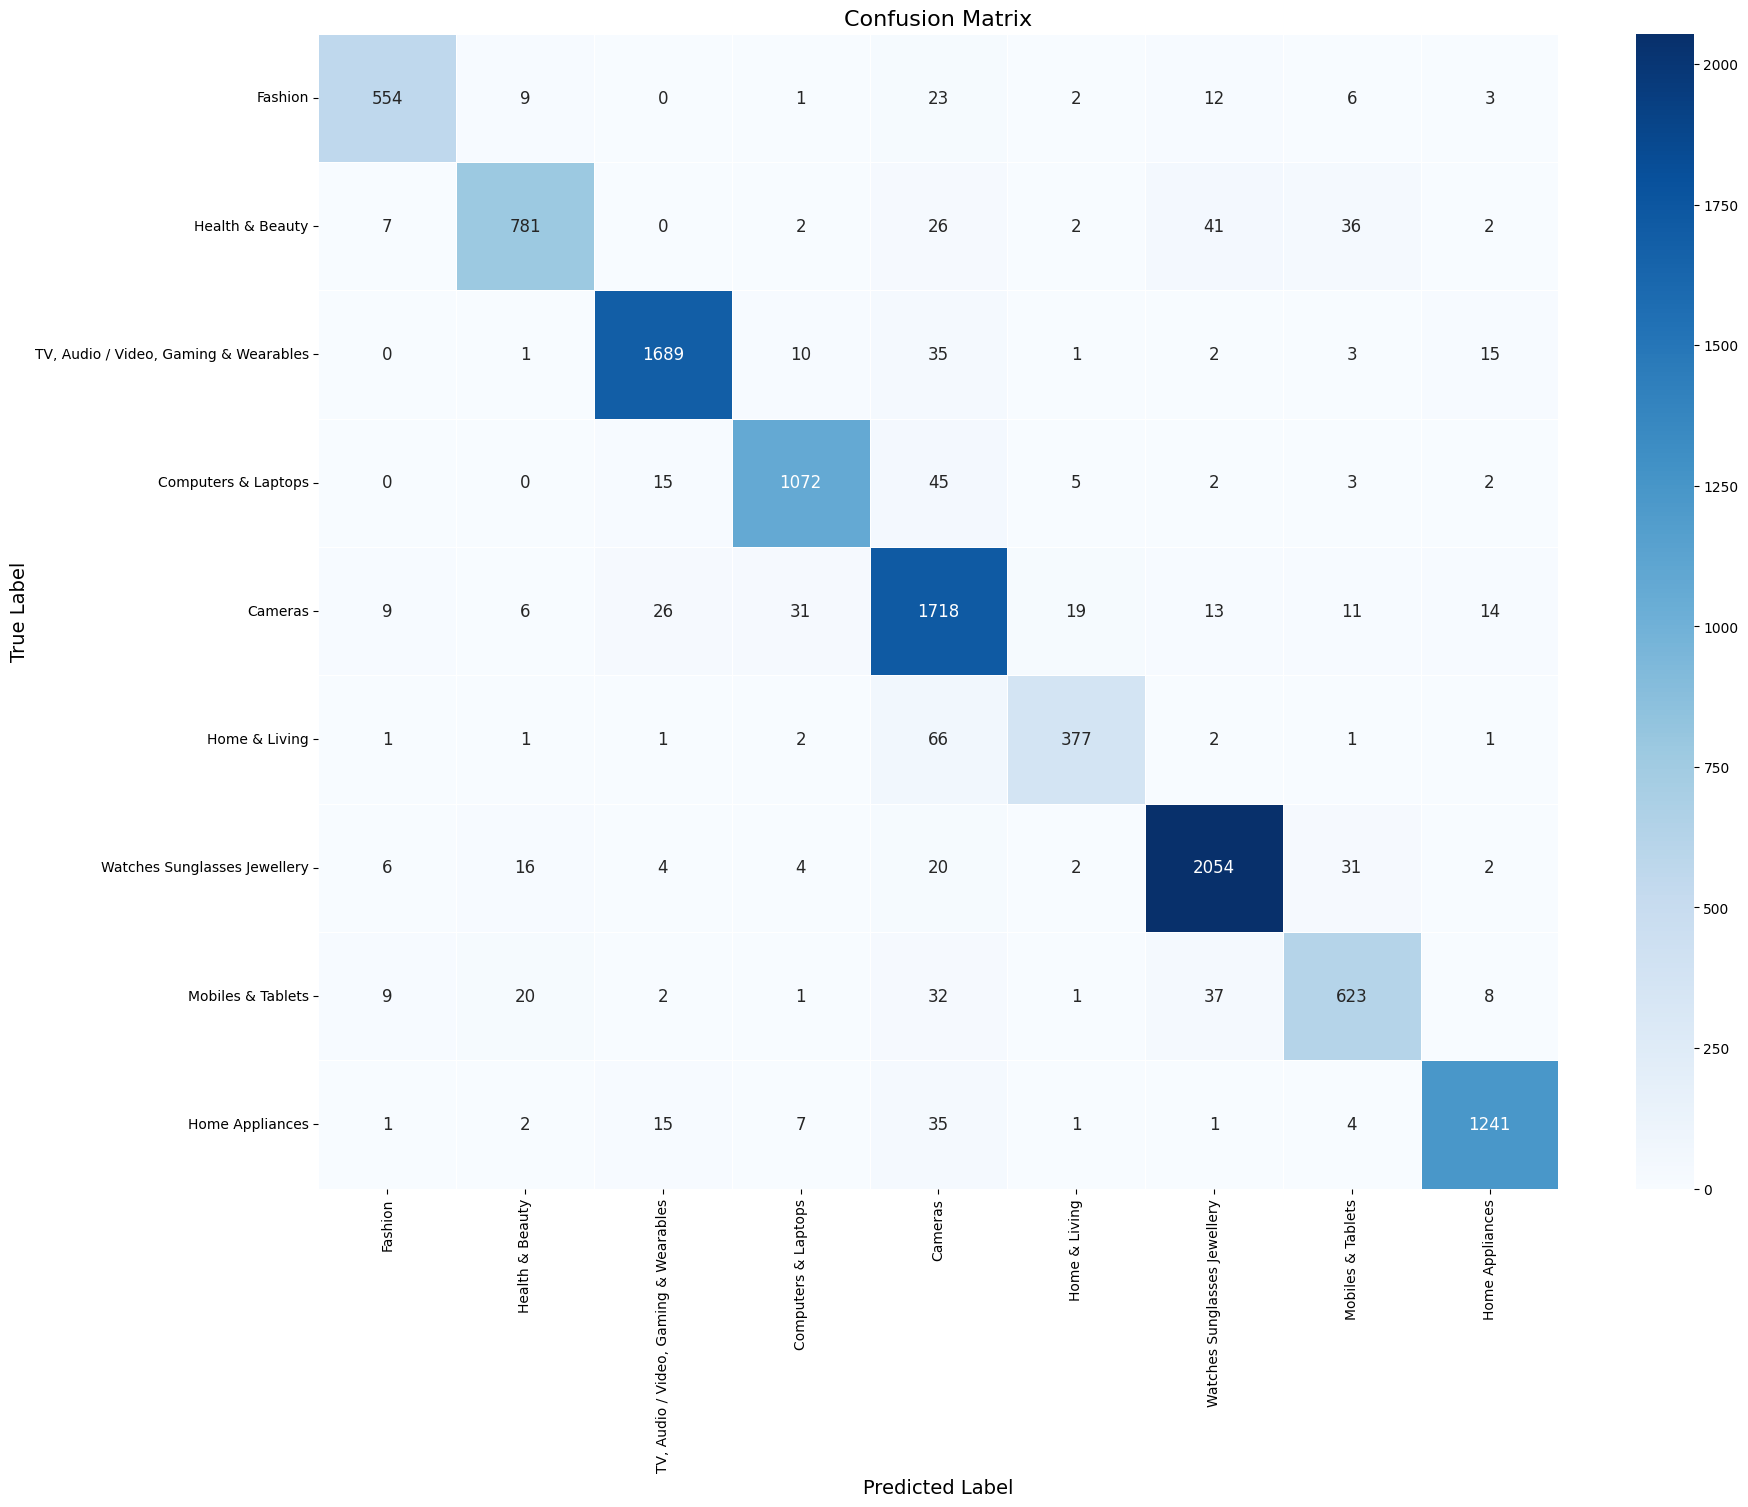

In [20]:
# from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate accuracy
accuracy = accuracy_score(y_test, Y_Pred_c1)
print(f"Accuracy: {accuracy*100}%")

# Calculate F1-score
f1 = f1_score(y_test, Y_Pred_c1, average='weighted')
print(f"F1-score: {f1*100}%")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, Y_Pred_c1)
# print("Confusion Matrix:")
# print(conf_matrix)  \ '_' /
#                       /\
print(classification_report(y_test, Y_Pred_c1))


# Plot confusion matrix as heatmap using Seaborn
plt.figure(figsize=(20, 15))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',  linewidths=.5, xticklabels=unique_cat1, yticklabels=unique_cat1, annot_kws={"size": 12})
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

### **CATEGORY 2**

In [21]:

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, category_lvl2, test_size=0.3, random_state=42)

#Creating an instance of Support Vector Machine (SVM) classifier
SVM_Classfier=SVC(kernel='linear' , random_state=0)
training_time = prediction_time = 0

model2_file_path = 'model2.pickle'

if os.path.exists(model2_file_path):

    with open(model2_file_path, 'rb') as file:
        model2 = pickle.load(file)
    print("Model 2 loaded from file.")
else:
  #Fitting the SVM classifier on the training set
  start_time = time.time()
  model2 = SVM_Classfier.fit(X_train,y_train)
  training_time = time.time() - start_time

#Predicting the output on the testing set
start_time = time.time()
Y_Pred_c2 = model2.predict(X_test)
prediction_time = time.time() - start_time

print(f'Training time: {training_time:.2f} seconds')
print(f'Prediction time: {prediction_time:.2f} seconds')
# print(Y_Pred_c2)

Training time: 201.05 seconds
Prediction time: 86.84 seconds


Accuracy: 85.92558566835095%
F1-score: 85.68093658566663%
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      2027
         1.0       0.87      0.83      0.85       343
         2.0       0.82      0.62      0.71        68
         3.0       0.73      0.69      0.71        95
         4.0       0.76      0.62      0.68       119
         5.0       0.91      0.88      0.89       104
         6.0       1.00      0.44      0.62        18
         7.0       0.84      0.82      0.83       223
         8.0       0.83      0.82      0.83       449
         9.0       0.97      0.85      0.91        34
        10.0       0.93      0.86      0.89       106
        11.0       0.69      0.55      0.61        20
        12.0       0.93      0.41      0.57        34
        13.0       0.78      0.61      0.68        23
        14.0       0.95      0.94      0.95       147
        15.0       0.86      0.93      0.90       119
        16.0       0.98

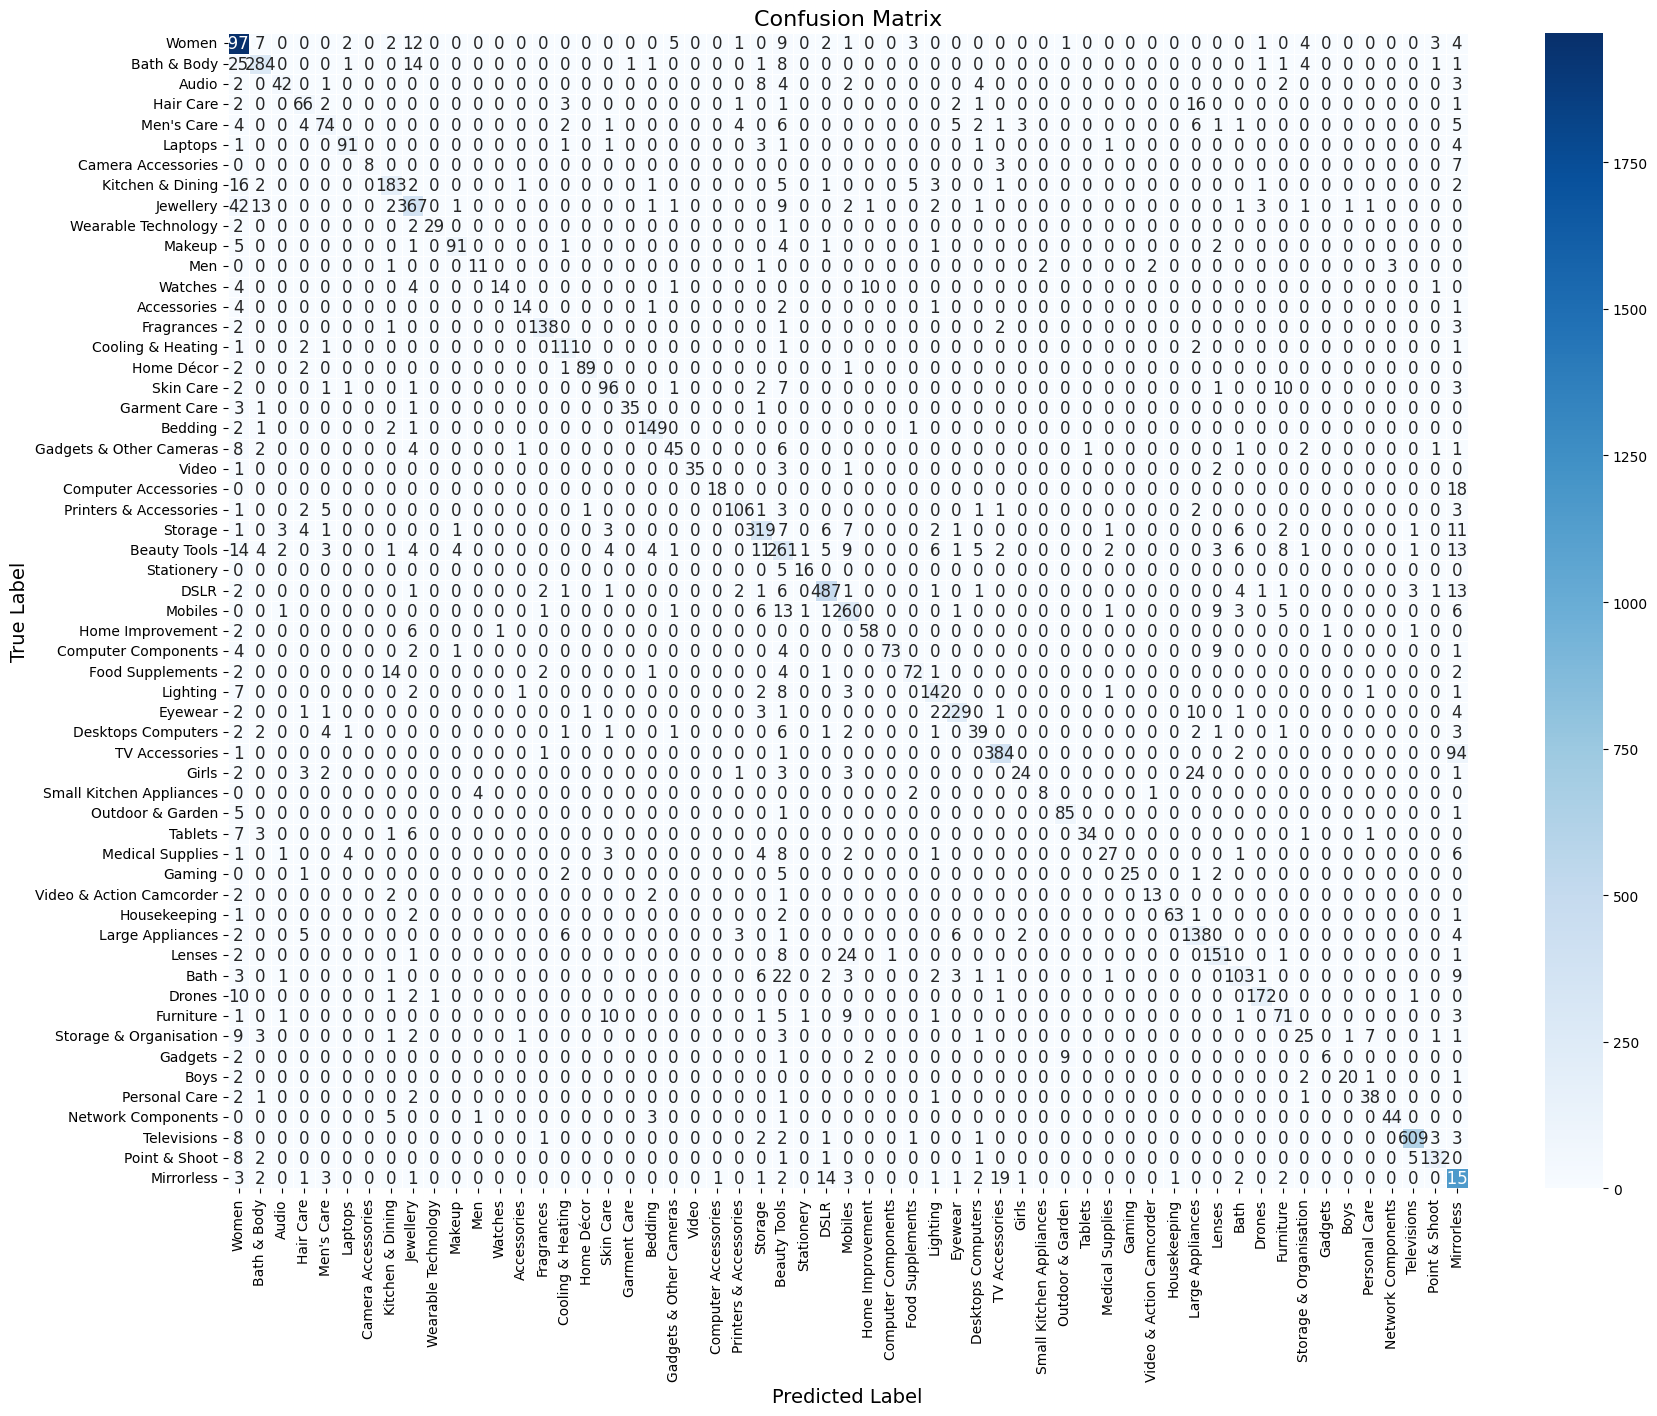

In [22]:
# Calculate accuracy
accuracy = accuracy_score(y_test, Y_Pred_c2)
print(f"Accuracy: {accuracy*100}%")

# Calculate F1-score
f1 = f1_score(y_test, Y_Pred_c2, average='weighted')
print(f"F1-score: {f1*100}%")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, Y_Pred_c2)
# print("Confusion Matrix:")
# print(conf_matrix)  \ '_' /
#                       /\
print(classification_report(y_test, Y_Pred_c2))


# Plot confusion matrix as heatmap using Seaborn
plt.figure(figsize=(20, 15))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',  linewidths=.5, xticklabels=unique_cat2, yticklabels=unique_cat2, annot_kws={"size": 12})
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

### **CATEGORY 3**

In [23]:

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, category_lvl3, test_size=0.3, random_state=42)

#Creating an instance of Support Vector Machine (SVM) classifier
SVM_Classfier=SVC(kernel='linear' , random_state=0)

model3_file_path = 'model3.pickle'

if os.path.exists(model3_file_path):

  with open(model3_file_path, 'rb') as file:
      model3 = pickle.load(file)
  print("Model loaded from file.")

else:
  #Fitting the SVM classifier on the training set

  start_time = time.time()
  model3 = SVM_Classfier.fit(X_train,y_train)
  training_time = time.time() - start_time

#Predicting the output on the testing set
start_time = time.time()
Y_Pred_c3= model3.predict(X_test)
prediction_time = time.time() - start_time

print(f'Training time: {training_time:.2f} seconds')
print(f'Prediction time: {prediction_time:.2f} seconds')
# print(Y_Pred_c3)

Training time: 316.95 seconds
Prediction time: 166.58 seconds


Accuracy: 76.22416169039963%
F1-score: 75.75053699225693%
              precision    recall  f1-score   support

         0.0       0.53      0.57      0.55        14
         1.0       0.76      0.88      0.82       170
         2.0       0.69      0.72      0.71        25
         3.0       0.34      0.41      0.37        27
         4.0       0.95      0.90      0.92        20
         5.0       0.85      0.74      0.79        23
         6.0       0.75      0.18      0.29        17
         7.0       0.74      0.57      0.65        40
         8.0       0.66      0.50      0.57        46
         9.0       0.89      0.93      0.91       271
        10.0       0.65      0.74      0.69        46
        11.0       0.78      0.44      0.56        16
        12.0       0.88      0.60      0.71        35
        13.0       0.90      0.45      0.60        20
        14.0       0.64      0.58      0.61       137
        15.0       0.92      0.83      0.87       113
        16.0       0.68

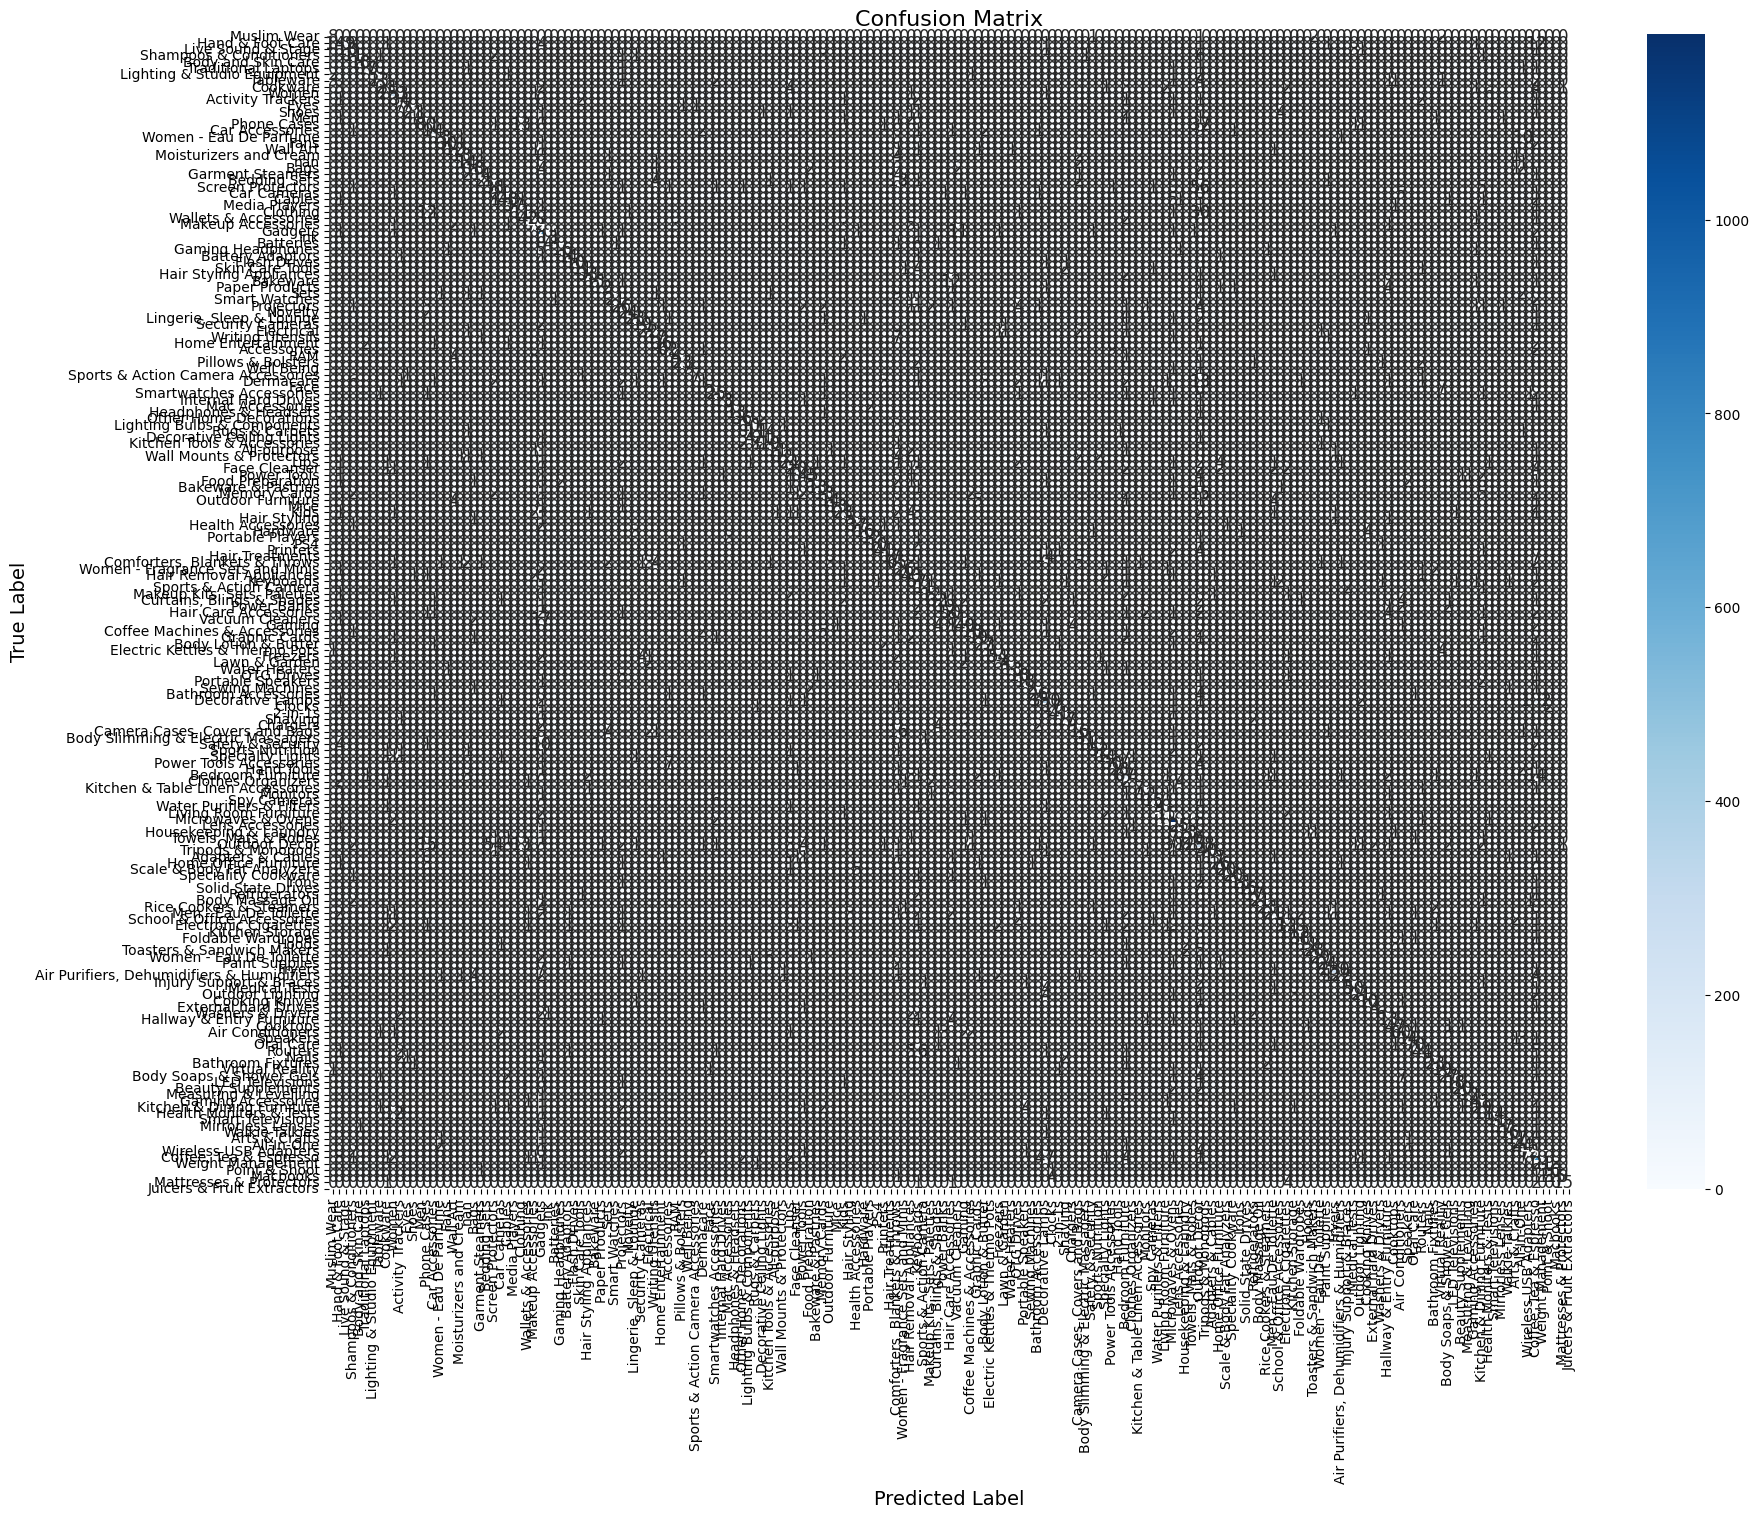

In [24]:
# Calculate accuracy
accuracy = accuracy_score(y_test, Y_Pred_c3)
print(f"Accuracy: {accuracy*100}%")

# Calculate F1-score
f1 = f1_score(y_test, Y_Pred_c3, average='weighted')
print(f"F1-score: {f1*100}%")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, Y_Pred_c3)
# print("Confusion Matrix:")
# print(conf_matrix)  \ '_' /
#                       /\
print(classification_report(y_test, Y_Pred_c3))


# Plot confusion matrix as heatmap using Seaborn
plt.figure(figsize=(20, 15))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',  linewidths=.5, xticklabels=unique_cat3, yticklabels=unique_cat3, annot_kws={"size": 12})
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

### saving the models

In [25]:
import pickle
pickle.dump(model1, open('model1.pickle', 'wb'))
pickle.dump(model2, open('model2.pickle', 'wb'))
pickle.dump(model3, open('model3.pickle', 'wb'))
pickle.dump(tfidf_vectorizer, open("vectorizer.pickle", "wb"))

# **TESTING DATA & IMPUTING**

In [26]:
endtime = 0
start_time = time.time()
# Load the training dataset
test_data = load_training_data('/content/drive/MyDrive/IR_Project/data_train.csv')

# Clean the dataset and obtain preprocessed data (title and description) and target variables (y1,y2,y3)
test_data,Y1,Y2,Y3= Cleaning_Data(test_data)
# Display missing data statistics for the original dataset
display_missing_data_stats(test_data)
endtime = time.time() - start_time
# Preserve unique labels for categorical columns before encoding
unique_cat1, unique_cat2, unique_cat3 = preserve_label(test_data)

# Encode and impute the categorical columns
encoded_and_imputed_data = encode_and_impute(test_data, ['category_lvl1', 'category_lvl2', 'category_lvl3'])

# Clean the imputed dataset and save it to a CSV file
test_df_imputed = clean_and_save_csv(encoded_and_imputed_data, test_data)

# Display missing data statistics for the imputed dataset
display_missing_data_stats(test_df_imputed)
print(f"Time: {endtime}")


Missing data statistics:
 category_lvl1          0
category_lvl2          0
category_lvl3       2135
titleDescription       0
dtype: int64

Percentage of missing data: 1.47%

Missing data statistics:
 category_lvl1    0
category_lvl2    0
category_lvl3    0
Title_desc       0
dtype: int64

Percentage of missing data: 0.00%
Time: 375.1152219772339


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer   # Importing TfidfVectorizer class from the sklearn library for text data preprocessing
X = test_df_imputed['Title_desc']    # Assigning the 'Title_desc' column of the 'train_df_imputed' dataframe to variable X
Y1 = test_df_imputed['category_lvl1']
Y2 = test_df_imputed['category_lvl2']
Y3 = test_df_imputed['category_lvl3']

x_test_tfidf = tfidf_vectorizer.transform(X)   # Transforming the textual data in X into numerical feature vectors using TfidfVectorizer and storing the resulting feature matrix in x_test_tfidf

## Predicting accuracy for testing data using training data

### **Predict Category 1**

In [28]:
y_pred_cat_one = model1.predict(x_test_tfidf)

Accuracy: 95.53234297053717%
F1-score: 95.53566197198178%
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96      1952
         1.0       0.96      0.91      0.93      2925
         2.0       0.98      0.98      0.98      5729
         3.0       0.97      0.96      0.96      4040
         4.0       0.91      0.96      0.93      6048
         5.0       0.95      0.90      0.92      1585
         6.0       0.97      0.97      0.97      7277
         7.0       0.91      0.91      0.91      2511
         8.0       0.98      0.97      0.97      4216

    accuracy                           0.96     36283
   macro avg       0.95      0.95      0.95     36283
weighted avg       0.96      0.96      0.96     36283



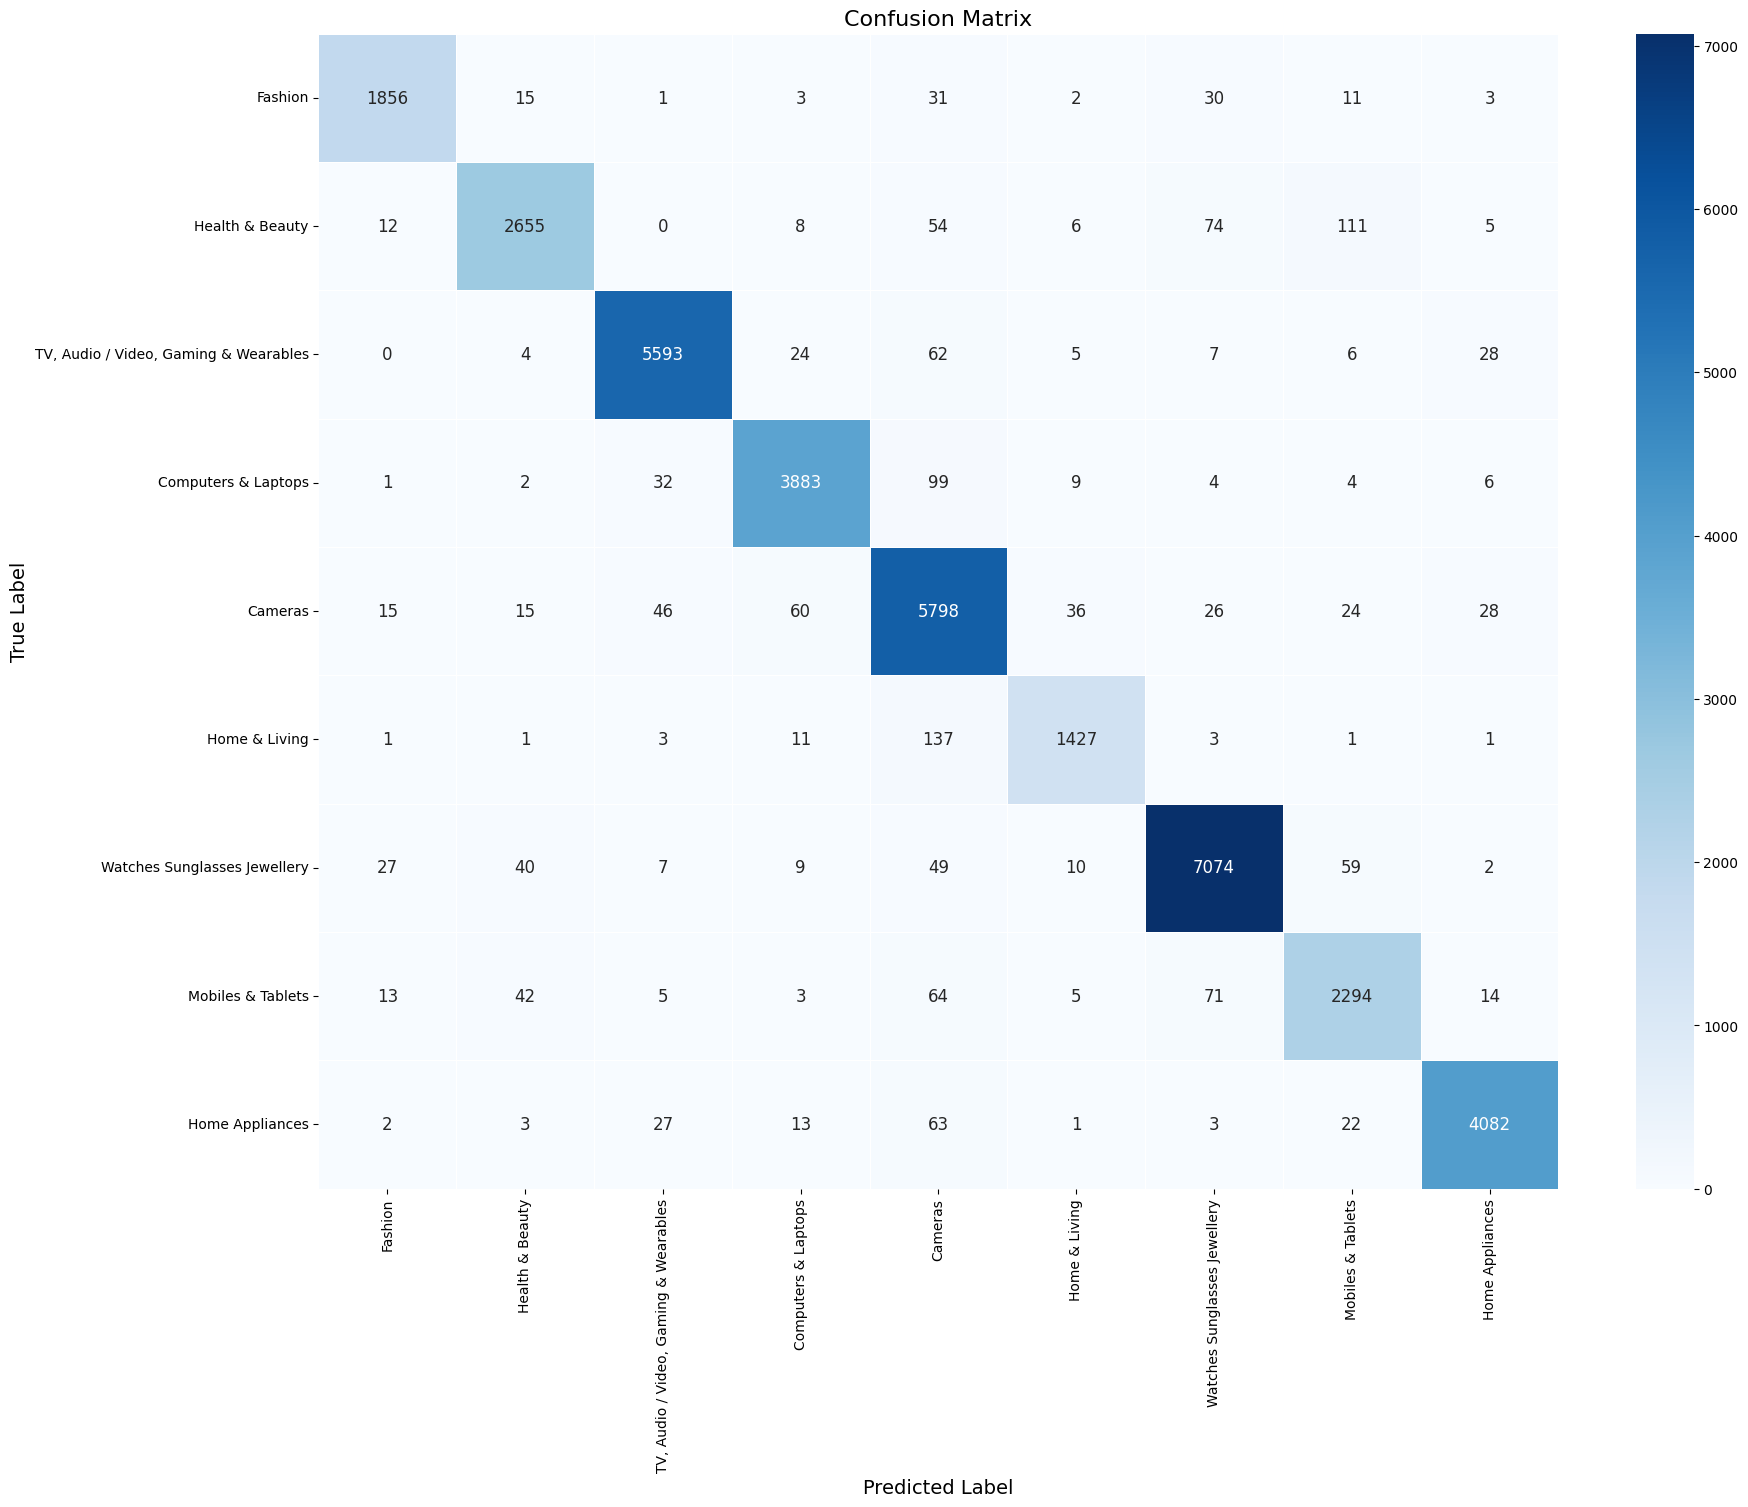

In [29]:
# Calculate accuracy
accuracy = accuracy_score(Y1, y_pred_cat_one)
print(f"Accuracy: {accuracy*100}%")

# Calculate F1-score
f1 = f1_score(Y1, y_pred_cat_one, average='weighted')
print(f"F1-score: {f1*100}%")

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y1, y_pred_cat_one)
# print("Confusion Matrix:")
# print(conf_matrix)  \ '_' /
#                       /\
print(classification_report(Y1, y_pred_cat_one))


# Plot confusion matrix as heatmap using Seaborn
plt.figure(figsize=(20, 15))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',  linewidths=.5, xticklabels=unique_cat1, yticklabels=unique_cat1, annot_kws={"size": 12})
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

### **Predict Category 2**

In [30]:
y_pred_cat_two = model2.predict(x_test_tfidf)

Accuracy: 91.8556899925585%
F1-score: 91.77048082002243%
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      6903
         1.0       0.89      0.89      0.89      1167
         2.0       0.91      0.81      0.85       239
         3.0       0.85      0.85      0.85       333
         4.0       0.88      0.81      0.84       428
         5.0       0.95      0.94      0.94       356
         6.0       0.93      0.66      0.77        64
         7.0       0.91      0.89      0.90       782
         8.0       0.90      0.88      0.89      1480
         9.0       0.99      0.93      0.96       120
        10.0       0.94      0.92      0.93       345
        11.0       0.84      0.76      0.80        55
        12.0       0.98      0.73      0.83       110
        13.0       0.90      0.79      0.84        58
        14.0       0.98      0.97      0.97       445
        15.0       0.95      0.96      0.96       458
        16.0       0.99 

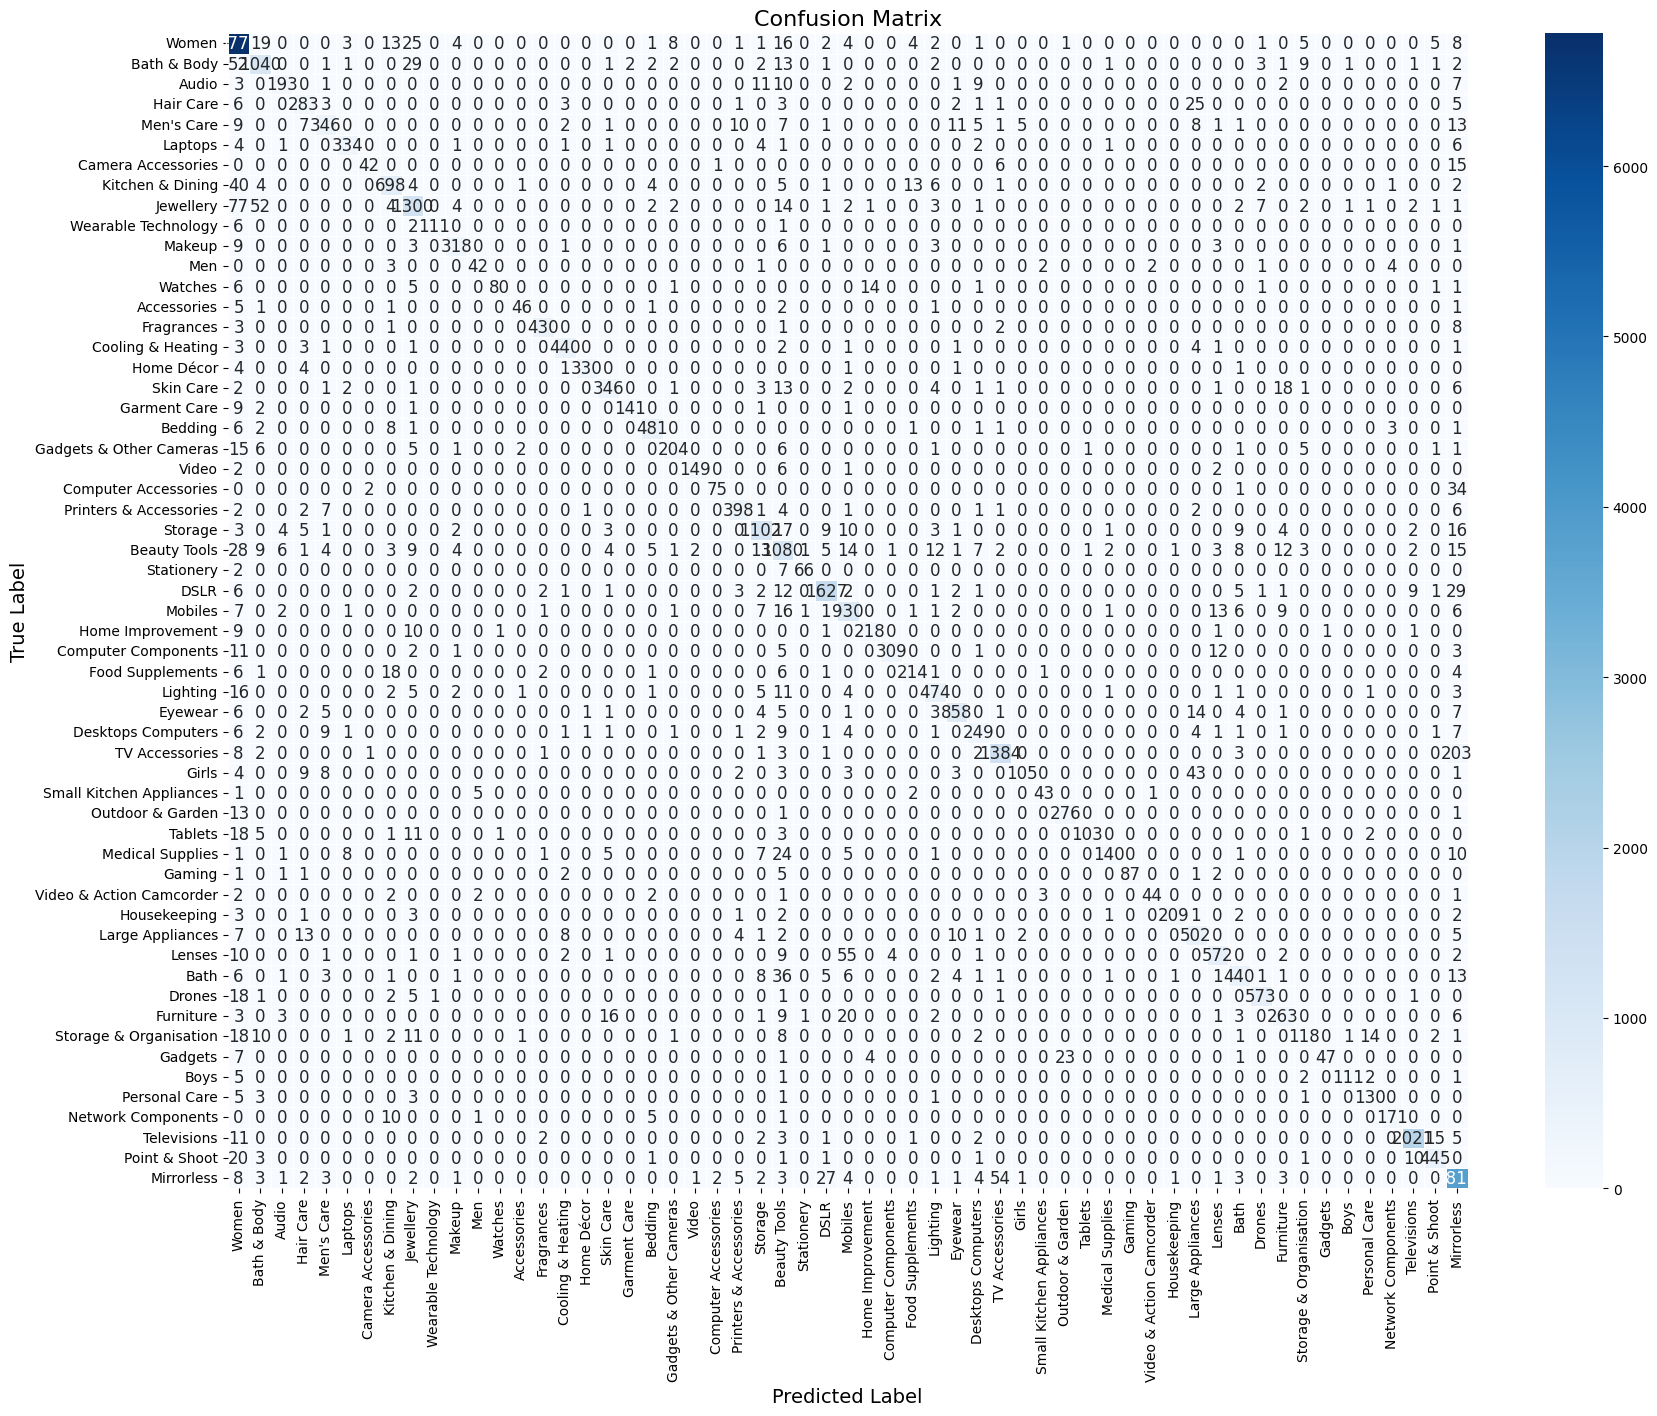

In [31]:
# Calculate accuracy
accuracy = accuracy_score(Y2, y_pred_cat_two)
print(f"Accuracy: {accuracy*100}%")

# Calculate F1-score
f1 = f1_score(Y2, y_pred_cat_two, average='weighted')
print(f"F1-score: {f1*100}%")

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y2, y_pred_cat_two)
# print("Confusion Matrix:")
# print(conf_matrix)  \ '_' /
#                       /\
print(classification_report(Y2, y_pred_cat_two))


# Plot confusion matrix as heatmap using Seaborn
plt.figure(figsize=(20, 15))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',  linewidths=.5, xticklabels=unique_cat2, yticklabels=unique_cat2, annot_kws={"size": 12})
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

### **Predict Category 3**

In [32]:
y_pred_cat_three = model3.predict(x_test_tfidf)

Accuracy: 87.0242262216465%
F1-score: 86.8938601927899%
              precision    recall  f1-score   support

         0.0       0.84      0.72      0.78        53
         1.0       0.87      0.91      0.89       570
         2.0       0.84      0.84      0.84        91
         3.0       0.62      0.72      0.67       120
         4.0       0.98      0.89      0.94        57
         5.0       0.95      0.93      0.94       105
         6.0       0.94      0.56      0.70        52
         7.0       0.84      0.78      0.81       116
         8.0       0.82      0.74      0.78       139
         9.0       0.94      0.96      0.95       873
        10.0       0.78      0.92      0.84       170
        11.0       0.93      0.62      0.75        64
        12.0       0.95      0.78      0.86       123
        13.0       0.96      0.77      0.86        71
        14.0       0.76      0.71      0.73       442
        15.0       0.95      0.91      0.93       341
        16.0       0.89  

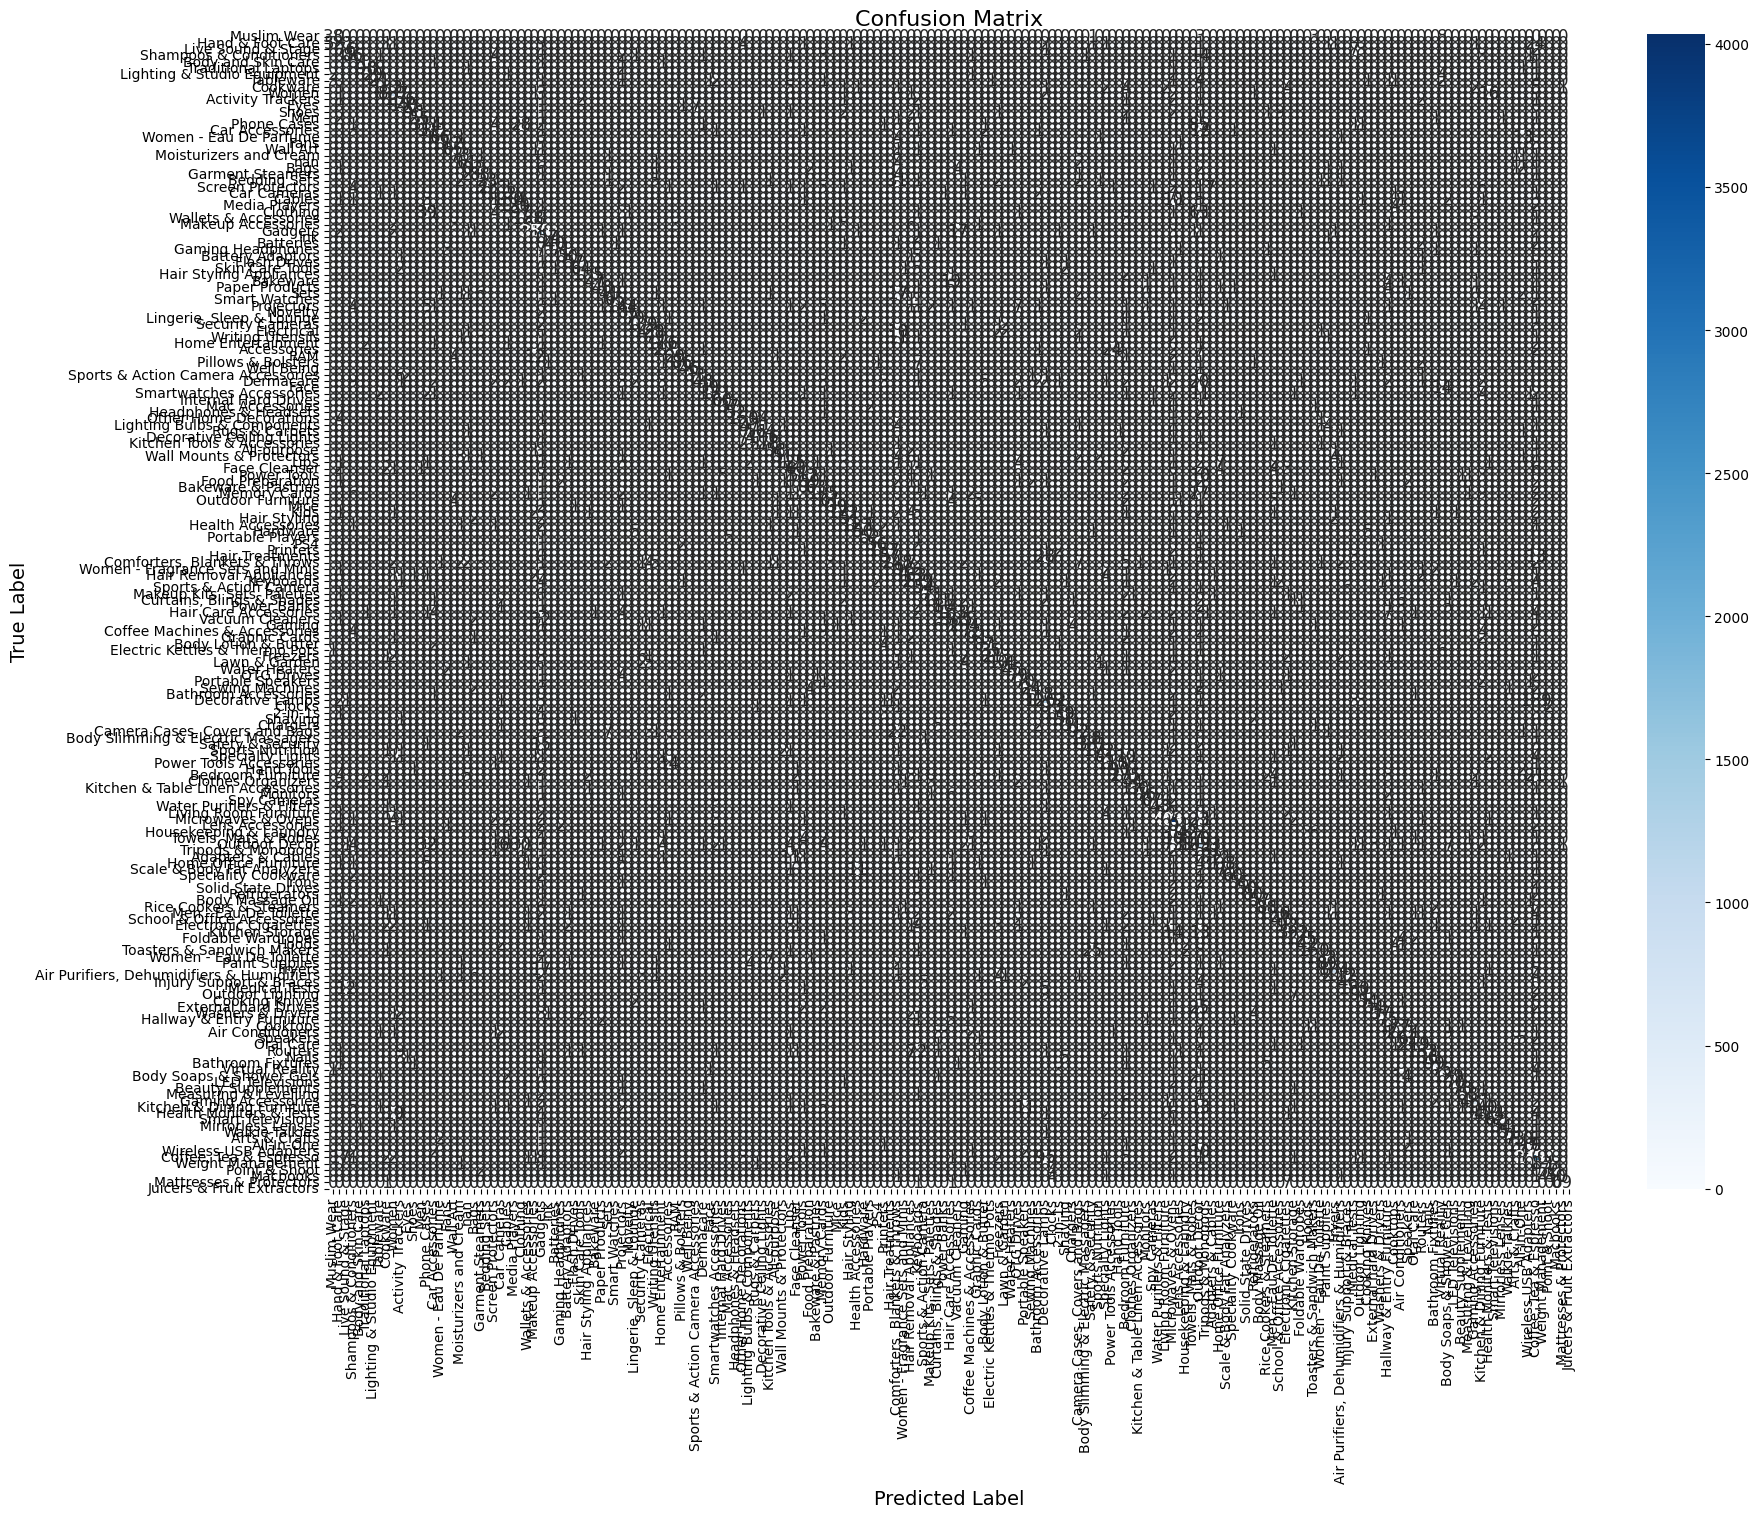

In [33]:
# Calculate accuracy
accuracy = accuracy_score(Y3, y_pred_cat_three)
print(f"Accuracy: {accuracy*100}%")

# Calculate F1-score
f1 = f1_score(Y3, y_pred_cat_three, average='weighted')
print(f"F1-score: {f1*100}%")

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y3, y_pred_cat_three)
# print("Confusion Matrix:")
# print(conf_matrix)  \ '_' /
#                       /\
print(classification_report(Y3, y_pred_cat_three))


# Plot confusion matrix as heatmap using Seaborn
plt.figure(figsize=(20, 15))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',  linewidths=.5, xticklabels=unique_cat3, yticklabels=unique_cat3, annot_kws={"size": 12})
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

### Decoding Numerical Labels

In [53]:
from sklearn.preprocessing import LabelEncoder

# Generic function to decode a number into a categorical label using LabelEncoder
def decode_category(number, unique_labels):
    le = LabelEncoder()
    le.fit(unique_labels)
    encoded_labels = le.transform(unique_labels)
    return str(le.inverse_transform([number]))

# Function to decode category 1
def decode_cat01(number):
    return decode_category(number, unique_cat1)

# Function to decode category 2
def decode_cat02(number):
    return decode_category(number, unique_cat2)

# Function to decode category 3
def decode_cat03(number):
    return decode_category(number, unique_cat3)


### **QUERY**

In [55]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict
import copy

# Load the SVM models from pickle files
def load_svm_models():
    with open('model1.pickle', 'rb') as file:
        model_c1_svm = pickle.load(file)
    with open('model2.pickle', 'rb') as file:
        model_c2_svm = pickle.load(file)
    with open('model3.pickle', 'rb') as file:
        model_c3_svm = pickle.load(file)
    return model_c1_svm, model_c2_svm, model_c3_svm

# Predict the category of a query using SVM models
def predict_query_svm(query):
    with open('vectorizer.pickle', 'rb') as file:
        tfidf_vectorizer = pickle.load(file)

    corpus_vocabulary = copy.deepcopy(tfidf_vectorizer.vocabulary_)
    corpus_vocabulary = defaultdict(lambda: len(corpus_vocabulary), corpus_vocabulary)

    model_c1_svm, model_c2_svm, model_c3_svm = load_svm_models()

    query_tfidf = TfidfVectorizer()
    query_tfidf.fit_transform(query)

    for word in query_tfidf.vocabulary_.keys():
        if word in tfidf_vectorizer.vocabulary_:
            corpus_vocabulary[word]

    query_vectorizer = TfidfVectorizer(vocabulary=corpus_vocabulary)
    query_tfidf_matrix = query_vectorizer.fit_transform(query)

    return (
        model_c1_svm.predict(query_tfidf_matrix),
        model_c2_svm.predict(query_tfidf_matrix),
        model_c3_svm.predict(query_tfidf_matrix)
    )



In [62]:
# Define a query string
# query="OH Fashion Women 925 Sterling Silver Chain Crystal Rhinestone Necklace Pendant (white)"
# query ="Elegant Women's Watch with Leather Strap and Gold Detailing"
# query="Organic Green Tea - 100% Natural Ingredients"
query= input("Enter a Query:  ")
query=PreProcessing(query)
# Print the preprocessed query
print("QUERY: ")
print(query)
# Convert the query into a list
query=[query]

m1,m2,m3=predict_query_svm(query)

m1 = int(m1[0]) if hasattr(m1, '__getitem__') else int(m1)
m2 = int(m2[0]) if hasattr(m2, '__getitem__') else int(m2)
m3 = int(m3[0]) if hasattr(m3, '__getitem__') else int(m3)


Ctg1=decode_cat01(int(m1))
Ctg2=decode_cat02(int(m2))
Ctg3=decode_cat03(int(m3))

print("\nRESULTING CATEGORIES: \n")
print(Ctg1,'\n',Ctg2,'\n',Ctg3)Z

Enter a Query:  Feelontop Punk Rock Rhinestone Star Shape Long Chain Earrings
QUERY: 
feelontop punk rock rhineston star shape long chain ear

RESULTING CATEGORIES: 

['Watches Sunglasses Jewellery'] 
 ['Jewellery'] 
 ['Women']
